In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




In [44]:
# --- Understanding Features and Instances ---
# Load California housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Display the dataset
print("Dataset (Features and Instances):")
print(df)


Dataset (Features and Instances):
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

     


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

DataFrame Summary Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.4

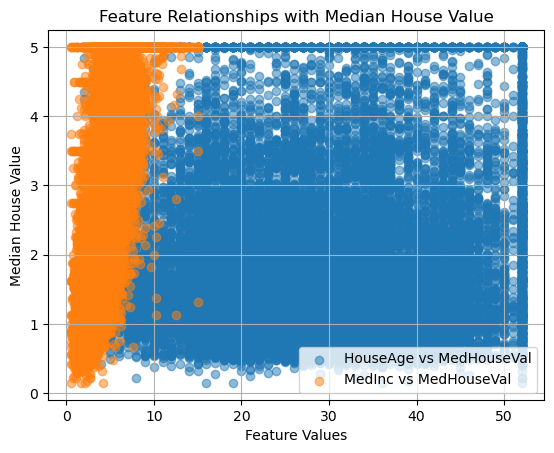

In [ ]:
# --- Review of Python DataFrames ---
print("\nDataFrame Information:")
print(df.info())
print("\nDataFrame Summary Statistics:")
print(df.describe())

# Features (X) and Target Variable (y)
X = df[['HouseAge', 'MedInc']]  # MedInc = Median Income, HouseAge = Age of House
y = df['MedHouseVal'] # MedHouseVal = Median House Value

# Visualizing the features
plt.scatter(df['HouseAge'], df['MedHouseVal'], alpha=0.5, label='HouseAge vs MedHouseVal')
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.5, label='MedInc vs MedHouseVal')
plt.xlabel("Feature Values")
plt.ylabel("Median House Value")
plt.legend()
plt.title("Feature Relationships with Median House Value")
plt.grid(True)
plt.show()



In [46]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")



Mean Squared Error: 0.6630
R-squared Score: 0.4941


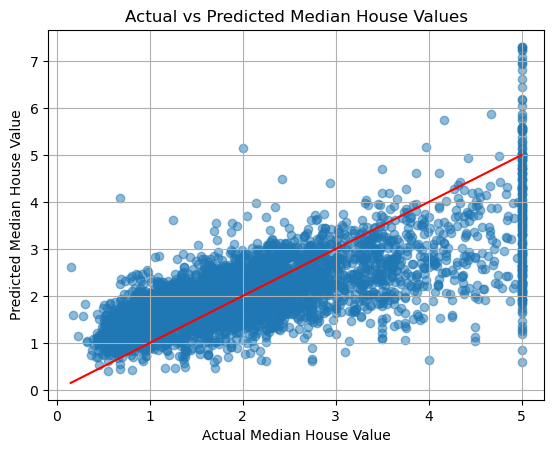

In [47]:

# Plot actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Median House Values")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # Ideal line
plt.grid(True)
plt.show()